# Perceptron

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 퍼셉트론 구현하기

### AND 게이트

In [2]:
def AND(x1,x2):
  w1,w2,theta = 0.5,0.5,0.7
  tmp = x1*w1 + x2*w2
  return 1 if tmp > theta else 0

In [3]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


### 가중치와 편향 도입

In [4]:
x = np.array([0,1])
w = np.array([0.5,0.5])
b = -0.7
w*x

array([0. , 0.5])

In [5]:
np.sum(w*x)

0.5

In [6]:
np.sum(w*x) + b

-0.19999999999999996

In [7]:
def AND(x1,x2):
  x=np.array([x1,x2])
  w=np.array([0.5,0.5])
  b=-0.7 # theta = -b 
  tmp = np.sum(w*x)+b
  
  return 1 if tmp > 0 else 0

In [8]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


### NAND/OR 게이트

In [9]:
def NAND(x1,x2):
  x = np.array([x1,x2])
  w = np.array([-0.5,-0.5])
  b = 0.7
  tmp = np.sum(x*w) + b

  return 1 if tmp > 0 else 0

In [10]:
def OR(x1,x2):
  x = np.array([x1,x2])
  w = np.array([.5,.5])
  b = -0.3
  tmp = np.sum(x*w) + b

  return 1 if tmp > 0 else 0

In [11]:
print('NAND')
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

NAND
1
1
1
0


In [12]:
print('OR')
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

OR
0
1
1
1


### XOR 게이트

In [13]:
def XOR(x1,x2):
  s1 = NAND(x1,x2)
  s2 = OR(x1,x2)
  y = AND(s1,s2)
  return y

In [14]:
print('XOR')
print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

XOR
0
1
1
0


## 이번 장에서 배운 내용
- 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다
- 퍼셉트론에서는 '가중치'와 '편향'을 매개변수로 설정한다.
- 퍼셉트론으로 AND,OR 게이트 등의 논리 회로를 표현할 수 있다.
- 단일 퍼셉트론으로는 XOR 게이트를 표현할 수 없다
- 2층 퍼셉트론(=다층 퍼셉트론)으로는 XOR 게이트를 표현할 수 있다.
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고,다층 퍼셉트론은 비선형 영역도 표현할 수 있다.

### 활성화 함수
- 활성화 함수 : 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할의 함수
- 퍼셉트론과 신경망의 차이점 -> 활성화 함수의 유/무

### step_function

In [15]:
def step_function(x): # x가 실수인 경우만 받을 수 있음 (np.array -> x)
    if x > 0:
        return 1
    else:
        return 0

In [20]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

/var/folders/6b/vq51j9_153n_8c0d82cvxh7w0000gn/T/ipykernel_93376/821751868.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


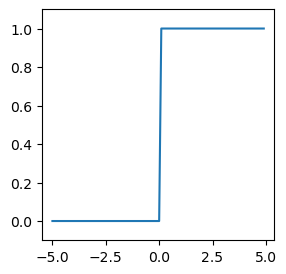

In [24]:
# step_function 시각화 
x = np.arange(-5.,5.,.1)
y = step_function(x)

plt.figure(figsize=(3,3))
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### Sigmoid

In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    

In [27]:
x = np.array([-1.,1.,2.])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

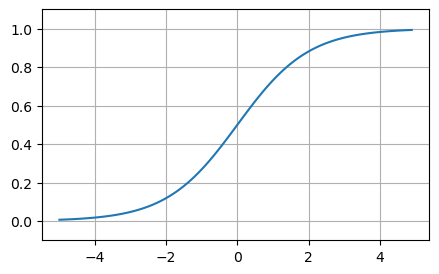

In [30]:
# sigmoid 시각화
x = np.arange(-5.,5.,.1)
y = sigmoid(x)

plt.figure(figsize=(5,3))
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.grid()
plt.show()

> ***비선형 함수***  
> 시그모이드와 계단함수는 모두 비선형 함수 입니다. 비선형 함수란 문자 그대로 '선형이 아닌' 함수로 직선 1개로는 그릴 수 없는 함수를 뜻합니다.

### ReLU(Recified Linear Unit)

In [33]:
def ReLU(x):
    return np.maximum(0,x) # np.maximum 은 두 값중 큰 값을 선택해 반환하는 함수

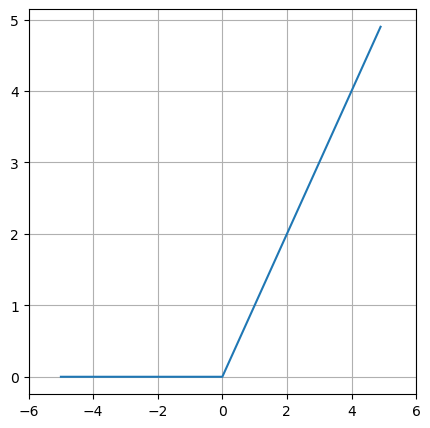

In [35]:
# ReLU 시각화
x = np.arange(-5.,5.,.1)
y = ReLU(x)

plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.grid()
plt.xlim(-6,6)
plt.show()

### 다차원 배열의 계산

In [36]:
# 1차원 배열
A = np.array([1,2,3,4,5,6])
print(np.ndim(A),A.shape)

1 (6,)


In [37]:
# 2차원 배열
B = np.array([[1,2],[3,4],[5,6]])
print(np.ndim(B),B.shape)

2 (3, 2)


### 행렬의 곱
- 행렬끼리의 곱은 앞 행렬의 열과 뒷 행렬의 행이 동일한 크기여야 합니다.

In [39]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
print('A:',A.shape,' B:',B.shape)
np.dot(A,B)

A: (2, 2)  B: (2, 2)


array([[19, 22],
       [43, 50]])

### 3층 신경망 구현하기

In [41]:
X = np.array([1.,.5])
W1 = np.array([[.1,.3,.5],[.2,.4,.6]])
B1 = np.array([.1,.2,.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1

(2, 3)
(2,)
(3,)


In [42]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [45]:
W2 = np.array([[.1,.4],[.2,.5],[.3,.6]])
B2 = np.array([.1,.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)


(3,)
(3, 2)
(2,)


In [46]:
def identity_funtion(x):
    return x

W3 = np.array([[.1,.3],[.2,.4]])
B3 = np.array([.1,.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_funtion(A3)